## **Projet de machine learning : Prédiction des prix de vente des marques de voitures**

Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import pickle




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Option 1 : import from Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
data = pd.read_csv('/content/norway_new_car_sales_by_make.csv',sep=',')

In [4]:
data ["Year"]= data ["Year"].astype(str)
data ["Month"] = data ["Month"].astype(str)
data["Period"] = data ["Month"]+" - "+ data ["Year"]
data

,Year,Month,Make,Quantity,Pct,Period
0,2007,1,Toyota,2884,22.7,1 - 2007
1,2007,1,Volkswagen,2521,19.9,1 - 2007
2,2007,1,Peugeot,1029,8.1,1 - 2007
3,2007,1,Ford,870,6.9,1 - 2007
4,2007,1,Volvo,693,5.5,1 - 2007
...,...,...,...,...,...,...
4372,2017,1,Nilsson,3,0.0,1 - 2017
4373,2017,1,Maserati,2,0.0,1 - 2017
4374,2017,1,Ferrari,1,0.0,1 - 2017
4375,2017,1,Smart,1,0.0,1 - 2017


In [0]:
#Déterminer Period comme index
import datetime
data['Period'] =  pd.to_datetime(data['Period'])
data.set_index('Period', inplace=True)




In [0]:
#Déterminer Make comme 2eme index
data.set_index('Make', inplace = True, append = True, drop = False) 



In [7]:
#Suppimer les colonnes 'Year', 'Month','Make','Pct
df= data.drop(['Year', 'Month','Make','Pct'], axis=1)
df

Quantity
Period     Make                
2007-01-01 Toyota          2884
           Volkswagen      2521
           Peugeot         1029
           Ford             870
           Volvo            693
...                         ...
2017-01-01 Nilsson            3
           Maserati           2
           Ferrari            1
           Smart              1
           Ssangyong          1

[4377 rows x 1 columns]

In [8]:
#Calcul de l'autocorrelation
data['Return']=data['Quantity'].pct_change()
autocorrelation=data['Return'].autocorr()
print("The autocorrelation is:", autocorrelation)
#Toute autocorrelation significative non nulle implique que les ventes peuvent être prévues a partir du passé

The autocorrelation is: -0.02608231229040843


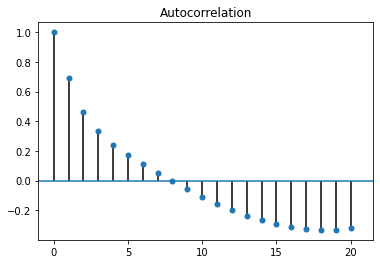

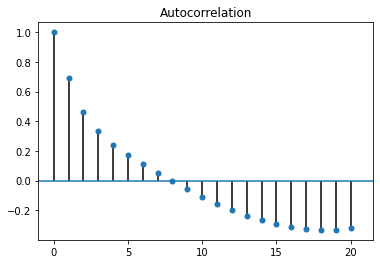

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Quantity'], lags=20, alpha=1)
#Corrélations positive et négative,  quand il y a une hausse de ventes durant une période
#la période suivante serait caracterisée par une baisse et l'inverse

In [10]:
df.groupby('Make').describe()

Quantity                           ...                        
                count         mean         std  ...     50%     75%     max
Make                                            ...                        
Alfa Romeo      117.0    16.076923   15.074044  ...    11.0    21.0    63.0
Aston Martin     27.0     1.777778    0.974022  ...     1.0     2.0     4.0
Audi            121.0   582.438017  115.599444  ...   579.0   653.0   987.0
BMW             121.0   605.909091  247.420829  ...   562.0   710.0  1663.0
Bentley          13.0     1.000000    0.000000  ...     1.0     1.0     1.0
...               ...          ...         ...  ...     ...     ...     ...
Think            54.0    14.222222   17.147162  ...     6.0    24.0    66.0
Toyota          121.0  1389.892562  297.618766  ...  1380.0  1529.0  2884.0
Volkswagen      121.0  1708.008264  392.062187  ...  1674.0  1960.0  3017.0
Volvo           121.0   825.925620  283.858009  ...   826.0   950.0  2072.0
Westfield         1.0     1.000000         NaN  ...     1.0     1.0     1.0

[65 rows x 8 columns]

In [11]:
df.groupby('Period').describe()

Quantity                                                           
              count        mean         std  min    25%    50%     75%     max
Period                                                                        
2007-01-01     38.0  333.815789  628.950600  1.0  10.25   76.0  359.50  2884.0
2007-02-01     38.0  257.710526  403.983536  1.0   6.75  101.5  350.75  1885.0
2007-03-01     38.0  296.421053  406.594468  1.0  18.50  151.0  396.00  1833.0
2007-04-01     38.0  233.000000  314.784353  1.0  12.50   92.0  357.75  1300.0
2007-05-01     37.0  324.513514  456.919129  2.0  18.00  155.0  431.00  1934.0
...             ...         ...         ...  ...    ...    ...     ...     ...
2016-09-01     34.0  407.470588  504.961579  4.0  30.50  234.0  630.25  2084.0
2016-10-01     35.0  340.914286  458.541253  1.0  14.00  216.0  529.00  2161.0
2016-11-01     34.0  388.058824  495.056895  1.0  31.25  235.5  546.25  2106.0
2016-12-01     35.0  388.628571  473.758072  1.0  38.50  270.0  537.00  2239.0
2017-01-01     35.0  373.000000  476.120783  1.0  13.50  191.0  568.00  1688.0

[121 rows x 8 columns]

In [12]:
##Les ventes sont-elles une marche aléatoire (avec dérivé)?
from statsmodels.tsa.stattools import adfuller
adfuller(data['Quantity'])
result = adfuller(data['Quantity'])
print("The p-value for the ADF test is ", result[1])
#p<5% donc notre exp est une marche aléatoire

The p-value for the ADF test is  1.7486109140002382e-29


In [13]:
############# On fait le split Training & Test
y = df.Quantity
X_train, X_test = train_test_split(df, test_size=0.2)
X_train.shape
X_test.shape

(876, 1)

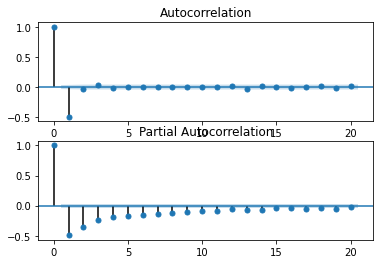

In [14]:
#Puisque la série des ventes,  est une marche aléatoire avec dérivé, on prendra les premières différences 
#pour les rendre stationnaire 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ventes = X_train.diff()
ventes = ventes.dropna()
# Plot ACF and PACF sur la meme page
fig, axes = plt.subplots(2,1)
# Plot  ACF
plot_acf(ventes, lags=20, ax=axes[0])
# Plot PACF
plot_pacf(ventes, lags=20, ax=axes[1])
plt.show()

In [15]:
####estimation du modèle ARMA 
from statsmodels.tsa.arima_model import ARMA

# Fit AR(1) modèle et print AIC:
mod_ar1 = ARMA(ventes, order=(1,0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

##Fit  AR(2) modèle et print AIC:
mod_ar2 = ARMA(ventes, order=(2,0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

### Fit ARMA(0,1) modèle et print AIC:
mod_arma11 = ARMA(ventes, order=(0,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)
# Le meilleur modèle est celui possédant l’AIC le plus faible AR(2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


The AIC for an AR(1) is:  53488.180250662146
The AIC for an AR(2) is:  53020.02808512379
The AIC for an ARMA(1,1) is:  52031.40545569247


In [16]:
from statsmodels.tsa.arima_model import ARIMA

# Prévision des ventes en utilisant ARMA
mod_arma11 = ARMA(X_train, order=(0,1))
res_arma11 = mod_arma11.fit()
print(res_arma11.summary())

                              ARMA Model Results                              
Dep. Variable:               Quantity   No. Observations:                 3501
Model:                     ARMA(0, 1)   Log Likelihood              -26017.068
Method:                       css-mle   S.D. of innovations            408.457
Date:                Sun, 07 Jun 2020   AIC                          52040.137
Time:                        19:03:41   BIC                          52058.619
Sample:                             0   HQIC                         52046.733
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            308.9106      6.885     44.864      0.000     295.415     322.406
ma.L1.Quantity    -0.0026      0.017     -0.149      0.881      -0.036       0.031
                                    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [17]:
print(res_ar2.params)

const            -0.011954
ar.L1.Quantity   -0.667110
ar.L2.Quantity   -0.354495
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


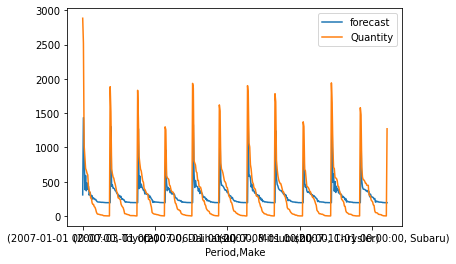

In [18]:
from statsmodels.tsa.arima_model import ARMA

# Prévision des ventes en utilisant AR(2)
mod_arma11 = ARMA(df, order=(0,1))
res_arma11 = mod_arma11.fit()

# Plot prévision des ventes
res_arma11.plot_predict(start='2007-01-01', end='2007-12-01')
plt.show()

# Export des résultats de test vers Csv

In [19]:
column_names = ["Period", "Quantity"]
rows_list=[]
#df_result = pd.DataFrame(columns = column_names)
for i in range(len(X_test)) : 
   element_start = X_test.index[i][0].strftime('%Y-%m-%d')
   print(element_start)
   day_value=element_start[8:10] 
   month_value = element_start[5:7] 
   if month_value == 12:
      next_month= 1
      year_value = element_start[0:4]+1
   else: 
      next_month= int(month_value)+1
      year_value = element_start[0:4] 

   element_end   = year_value +'-' +str(next_month)+'-'+day_value
   #print(element_end)
   #predict_val= res_arma11.predict(start='2007-11-01', end='2007-12-01')
   try:
     predict_val= res_arma11.predict(start=element_start, end=element_end)
     print(predict_val)
   except KeyError as e:
     print(e)
   rows_list.append([element_start,predict_val])

df_result = pd.DataFrame(rows_list, columns=column_names)
# Export Results to CSV
df_result.to_csv('/content/result_tests.csv')

Streaming output truncated to the last 5000 lines.
            Mercedes-Benz    265.593384
            Suzuki           234.018348
            Citroen          246.720530
            Renault          235.120980
            Saab             217.811629
            Kia              207.985102
            Fiat             212.592926
            Lexus            206.347629
            Think            210.024513
            Dodge            201.383579
            Chevrolet        201.172181
            Land Rover       200.119151
            MINI             200.739117
            Jeep             196.252905
            Chrysler         195.950415
            Smart            196.128504
            Isuzu            195.434910
            Nilsson          195.843260
            Jaguar           195.014102
            Daihatsu         195.502264
            Alfa Romeo       194.626117
2009-03-01  Toyota           194.553199
dtype: float64
2012-01-01
Period      Make         
2012-01-01  Volks

# Export du Modèle

In [0]:
pickle.dump(res_arma11, open('/content/sample_data/model.pkl','wb'))
loaded_model = pickle.load(open("/content/sample_data/model.pkl", "rb")) 

# Flask

In [0]:
def ValuePredictor(to_predict_list): 
	to_predict = np.array(to_predict_list).reshape(1, 12) 
	loaded_model = pickle.load(open("/content/sample_data/model.pkl", "rb")) 
	result = loaded_model.predict(to_predict) 
	return result[0] 

In [0]:
from flask import Flask, request, jsonify, render_template
app = Flask(__name__)
@app.route('/')
def index():
   return render_template('/content/index.html')
    
@app.route('/result', methods = ['POST']) 
def result(): 
	if request.method == 'POST': 
		to_predict_list = request.form.to_dict() 
		to_predict_list = list(to_predict_list.values()) 
		result = ValuePredictor(to_predict_list)		 
		return render_template("/content/result.html", prediction = result) 
	
if __name__ == '__main__':
   app.run(host= '0.0.0.0')

In [0]:
##LSTM pour prédicition des ventes de voitures##

In [0]:
from keras.layers import LSTM
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import keras.models
from keras.layers import Activation, Dense
from math import*

Using TensorFlow backend.


In [0]:
# Normaliser l'ensemble de données
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [0]:
## split train/ test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2932 1445


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
#reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
# create and fit the LSTM network
model = keras.models.Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 21s - loss: 0.0082
Epoch 2/100
 - 19s - loss: 0.0078
Epoch 3/100
 - 19s - loss: 0.0078
Epoch 4/100
 - 19s - loss: 0.0078
Epoch 5/100
 - 19s - loss: 0.0078
Epoch 6/100
 - 19s - loss: 0.0078
Epoch 7/100
 - 19s - loss: 0.0078
Epoch 8/100
 - 19s - loss: 0.0078
Epoch 9/100
 - 19s - loss: 0.0078
Epoch 10/100
 - 19s - loss: 0.0078
Epoch 11/100
 - 19s - loss: 0.0078
Epoch 12/100
 - 19s - loss: 0.0078
Epoch 13/100
 - 19s - loss: 0.0078
Epoch 14/100
 - 19s - loss: 0.0078
Epoch 15/100
 - 19s - loss: 0.0078
Epoch 16/100
 - 19s - loss: 0.0078
Epoch 17/100
 - 19s - loss: 0.0078
Epoch 18/100
 - 19s - loss: 0.0078
Epoch 19/100
 - 19s - loss: 0.0078
Epoch 20/100
 - 19s - loss: 0.0078
Epoch 21/100
 - 19s - loss: 0.0078
Epoch 22/100
 - 19s - loss: 0.0078
Epoch 23/100
 - 19s - loss: 0.0078
Epoch 24/100
 - 19s - loss: 0.0078
Epoch 25/100
 - 19s - loss: 0.0078
Epoch 26/100
 - 19s - loss: 0.0078
Epoch 27/100
 - 19s - loss: 0.0078
Epoch 28/100
 - 19s - loss: 0.0078
Epoch 29/100
 - 19s - loss: 0

In [0]:

import math
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [0]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 265.15 RMSE
Test Score: 350.05 RMSE


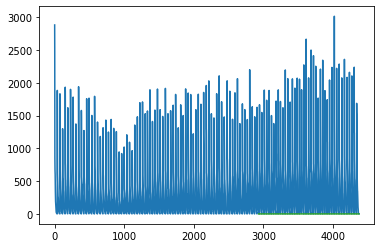

In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredict= trainPredictPlot[look_back:len(trainPredict)+look_back, :] 
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()